In [34]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [35]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    number3: int
    operation2: str
    number4: int
    final_number1: int
    final_number2: int

In [36]:
def adder1(state: AgentState) -> AgentState:
    """This node add 2 numbers"""
    state["final_number1"] = state["number1"] + state["number2"]
    return state


def adder2(state: AgentState) -> AgentState:
    """This node add 2 numbers"""
    state["final_number2"] = state["number3"] + state["number4"]
    return state


def subtractor1(state: AgentState) -> AgentState:
    """This node subtract 2 numbers"""
    state["final_number1"] = state["number1"] - state["number2"]
    return state


def subtractor2(state: AgentState) -> AgentState:
    """This node subtract 2 numbers"""
    state["final_number2"] = state["number3"] - state["number4"]
    return state


def decide_next_node1(state: AgentState) -> AgentState:
    """This node will select the next phase of the graph"""
    if state["operation1"] == "+":
        return "addition_opertation1"
    elif state["operation1"] == "-":
        return "subtractor_operation1"


def decide_next_node2(state: AgentState) -> AgentState:
    """This node will select the next phase of the graph"""
    if state["operation2"] == "+":
        return "addition_opertation2"
    elif state["operation2"] == "-":
        return "subtractor_operation2"

In [37]:
graph = StateGraph(AgentState)

graph.add_node("router1", lambda state: state)  # passthrough function
graph.add_node("add_node1", adder1)
graph.add_node("subtract_node1", subtractor1)

graph.add_node("router2", lambda state: state)  # passthrough function
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    {
        # Edge: Node
        "addition_opertation1": "add_node1",
        "subtractor_operation1": "subtract_node1",
    },
)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        # Edge: Node
        "addition_opertation2": "add_node2",
        "subtractor_operation2": "subtract_node2",
    },
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

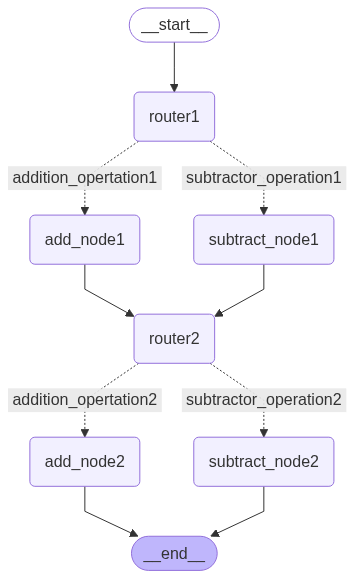

In [38]:
from IPython.display import Image, display

display((Image(app.get_graph().draw_mermaid_png())))

In [39]:
initial_state_1 = AgentState(
    number1=1,
    operation1="+",
    number2=2,
    number3=5,
    operation2="-",
    number4=5,
)
print(app.invoke(initial_state_1))

{'number1': 1, 'operation1': '+', 'number2': 2, 'number3': 5, 'operation2': '-', 'number4': 5, 'final_number1': 3, 'final_number2': 0}
